## Dijkstra's algorithm

In [25]:
#!pip install requests
#!pip install pandas
#!pip install networkx

In [26]:
import requests
import math
import time
import json
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [27]:
def round_math(value, decimals=2):
    if value is None:
        return None
    factor = 10 ** decimals
    if value >= 0:
        return math.floor(value * factor + 0.5) / factor
    else:
        return math.ceil(value * factor - 0.5) / factor
    
check_pointsto_tittle = {
    100: "Arco de Santa Catalina",
    200: "Ruinas de santa clara",
    300: "Real Palacio de los Capitanes Generales",
    400: "Museo de San Agustín",
    500: "Convento Santa Teresa de Jesús",
    600: "Iglesia de Nuestra Señora de El Carmen",
    700: "Paseo de los Museos",
    800: "Museo Nacional de Arte de Guatemala",
    900: "Marco Arte Galeria",
    1000: "ChocoMuseo"
}

title_to_check_points = {
    "Arco de Santa Catalina": 100,
    "Ruinas de santa clara": 200,
    "Real Palacio de los Capitanes Generales": 300,
    "Museo de San Agustín": 400,
    "Convento Santa Teresa de Jesús": 500,
    "Iglesia de Nuestra Señora de El Carmen": 600,
    "Paseo de los Museos": 700,
    "Museo Nacional de Arte de Guatemala": 800,
    "Marco Arte Galeria": 900,
    "ChocoMuseo": 1000
}

def nodo_name(n: int) -> str:
    rows = [
        "1a Calle Poniente",
        "2a Calle Poniente",
        "3a Calle Poniente",
        "4a Calle Poniente",
        "5a Calle Poniente",
        "6a Calle Poniente",
        "7a Calle Poniente"
    ]

    columns = [
        ("Alameda Santa Lucia", "Calzada Santa Lucia Sur"),
        "7a Avenida Norte",
        "6a Avenida Norte",
        "5a Avenida Norte",
        "4a Avenida Norte",
        "3a Avenida Norte",
        "2a Avenida Norte",
        "1a Avenida Norte"
    ]

    row_index = math.floor(n / 8)
    col_index = n % 8

    col = columns[col_index]
    if isinstance(col, tuple):
        if row_index < 4:
            col = col[0]
        else:
            col = col[1]
    return rows[row_index], col

def distance(tuple1, tuple2):
    return round_math(math.sqrt((tuple2[0] - tuple1[0])**2 + (tuple2[1] - tuple1[1])**2))


### Coordinates of the intersections of the chosen area (Antigua Guatemala)

In [28]:
coordinates = [(14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.53, -90.74), (14.56, -90.74), (14.53, -90.74), (14.53, -90.74), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.33, -91.03), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73)]

### Add edges

In [29]:
col_rules = ["both", "desc", "asc", "desc", "asc", "desc", "asc", "desc"]
row_rules = ["both", "asc", "desc", "asc", "desc", "both", "asc"]

map_graph = nx.DiGraph()
for node in range(8*7):
    map_graph.add_node(node)

for row in range(7-1):
    for col in range(8):

        # Add column edges with weight
        current_node = row*8 + col
        down_node = (row+1)*8 + col
        weight = distance(coordinates[current_node], coordinates[down_node])
        
        if col_rules[col] == "both":
            map_graph.add_edge(current_node, down_node, weight=weight)
            map_graph.add_edge(down_node, current_node, weight=weight)
        elif col_rules[col] == "asc":
            map_graph.add_edge(current_node, down_node, weight=weight)
        elif col_rules[col] == "desc":
            map_graph.add_edge(down_node, current_node, weight=weight)

for row in range(7):
    for col in range(8-1):
        
        # Add row edges with weight
        current_node = row*8 + col
        right_node = row*8 + (col+1)
        weight = distance(coordinates[current_node], coordinates[right_node])
        
        if row_rules[row] == "both":
            map_graph.add_edge(current_node, right_node, weight=weight)
            map_graph.add_edge(right_node, current_node, weight=weight)
        elif row_rules[row] == "asc":
            map_graph.add_edge(current_node, right_node, weight=weight)
        elif row_rules[row] == "desc":
            map_graph.add_edge(right_node, current_node, weight=weight)

#print(map_graph.nodes[0])

### Show map

In [30]:
#cols = 8
#rows = 7
#pos = {}
#
#for r in range(rows):
#    for c in range(cols):
#        node = r * cols + c
#        pos[node] = (c * 5, -r * 5)
#        
#nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
#edge_labels = nx.get_edge_attributes(map_graph, 'weight')
#nx.draw_networkx_edge_labels(map_graph, pos, edge_labels=edge_labels)
#plt.show()

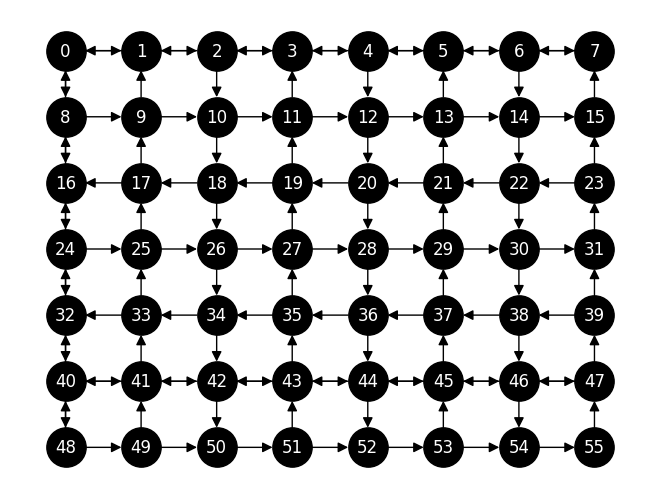

In [31]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)

nodes_with_pos = [node for node in map_graph.nodes() if node in pos]
subgraph = map_graph.subgraph(nodes_with_pos)

nx.draw(subgraph, pos, 
        with_labels=True, 
        node_color='black', 
        edge_color='black', 
        alpha=1.0, 
        font_color='white', 
        node_size=800, 
        arrowsize=15)

plt.show()

In [32]:
check_points = [
    [(14.55973874508855, -90.73422076688449), 11, 3],
    [(14.554861968606817, -90.73105039584416), 54, 46],
    [(14.55626906661756, -90.73375942692432), 35, 36],
    [(14.55638848781278, -90.73640944943139), 33, 25],
    [(14.560640514277763, -90.7328168111516), 4, 5],
    [(14.559021159325468, -90.73242656800224), 13, 21],
    [(14.559498244001478, -90.72953646953226), 7, 15],
    [(14.5559597646901, -90.73416059786072), 43, 35],
    [(14.55563265368269, -90.73533540546954), 42, 34],
    [(14.55739052385006, -90.7340214253345), 26, 27]
]

for point in check_points:
    try:
        map_graph.remove_edge(point[1], point[2])
    except:
        pass
    try:
        map_graph.remove_edge(point[2], point[1])
    except:
        pass


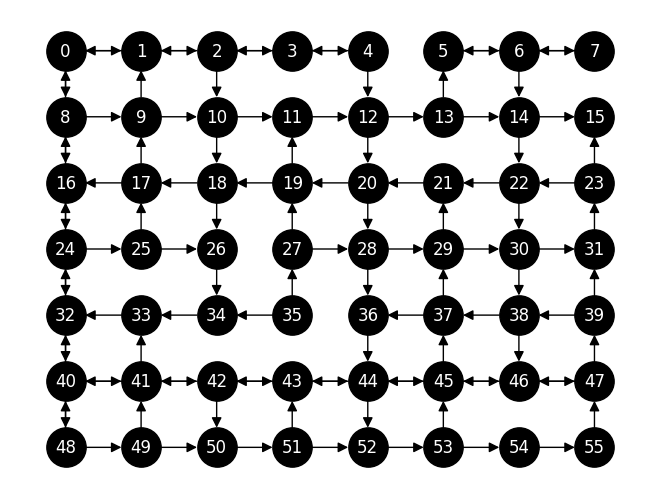

In [33]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)

nodes_with_pos = [node for node in map_graph.nodes() if node in pos]
subgraph = map_graph.subgraph(nodes_with_pos)

nx.draw(subgraph, pos, 
        with_labels=True, 
        node_color='black', 
        edge_color='black', 
        alpha=1.0, 
        font_color='white', 
        node_size=800, 
        arrowsize=15)

plt.show()

In [34]:
check_points = [
    [(14.55973874508855, -90.73422076688449), 11, 3],
    [(14.554861968606817, -90.73105039584416), 54, 46],
    [(14.55626906661756, -90.73375942692432), 36, 35],
    [(14.55638848781278, -90.73640944943139), 33, 25],
    [(14.560640514277763, -90.7328168111516), 4, 5],
    [(14.559021159325468, -90.73242656800224), 13, 21],
    [(14.559498244001478, -90.72953646953226), 7, 15],
    [(14.5559597646901, -90.73416059786072), 43, 35],
    [(14.55563265368269, -90.73533540546954), 42, 34],
    [(14.55739052385006, -90.7340214253345), 26, 27]
]

num = 100
map_graph.add_node(num)
from_node = 11
to_node = 3
coord = check_points[0][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 200
map_graph.add_node(num)
from_node = 54
to_node = 46
coord = check_points[1][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 300
map_graph.add_node(num)
from_node = 36
to_node = 35
coord = check_points[2][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 400
map_graph.add_node(num)
from_node = 33
to_node = 25
coord = check_points[3][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 500
map_graph.add_node(num)
from_node = 4
to_node = 5
coord = check_points[4][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

from_node = 5
to_node = 4
coord = check_points[4][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 600
map_graph.add_node(num)
from_node = 21
to_node = 13
coord = check_points[5][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 700
map_graph.add_node(num)
from_node = 15
to_node = 7
coord = check_points[6][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 800
map_graph.add_node(num)
from_node = 43
to_node = 35
coord = check_points[7][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 900
map_graph.add_node(num)
from_node = 42
to_node = 34
coord = check_points[8][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 1000
map_graph.add_node(num)
from_node = 26
to_node = 27
coord = check_points[9][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

#node = 1000
#print(f"Node {node}:")
#for neighbor in map_graph.neighbors(node):
#    weight = map_graph[node][neighbor]['weight']
#    print(f"  -> {neighbor} (weight: {weight})")

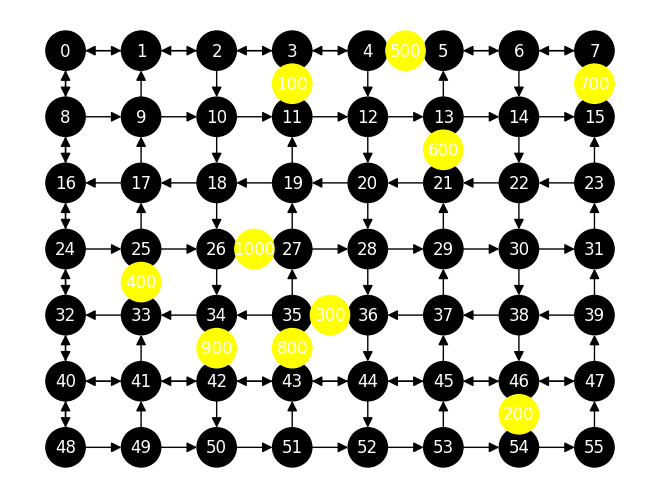

In [35]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)

checkpoint_nodes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for i, checkpoint_node in enumerate(checkpoint_nodes):
    coord, from_node, to_node = check_points[i]
    pos[checkpoint_node] = ((pos[from_node][0] + pos[to_node][0]) / 2, 
                           (pos[from_node][1] + pos[to_node][1]) / 2)

node_colors = []
for node in map_graph.nodes():
    if node in checkpoint_nodes:
        node_colors.append('yellow')
    else:
        node_colors.append('black')

nx.draw(map_graph, pos, 
        with_labels=True, 
        node_color=node_colors, 
        font_color='white',
        node_size=800, 
        arrowsize=15)

plt.show()

In [36]:

def dijikstra(start_node, end_node, map_graph):
    try:
        path = nx.dijkstra_path(map_graph, source=start_node, target=end_node, weight='weight')
        cost = nx.dijkstra_path_length(map_graph, source=start_node, target=end_node, weight='weight')
        return path, cost
    except nx.NetworkXNoPath:
        return None, float('inf')
    except nx.NodeNotFound as e:
        return None, str(e)
    
#print(dijikstra(0, 100, map_graph))

In [37]:

def route_simple(start, end, map_graph):
    return dijikstra(start, end, map_graph)

def route_with_stop(start, stop, end, map_graph):
    path1, cost1 = dijikstra(start, stop, map_graph)
    path2, cost2 = dijikstra(stop, end, map_graph)
    if path1 is None or path2 is None:
        return None, float('inf')
    full_path = path1 + path2[1:]
    total_cost = cost1 + cost2
    return full_path, total_cost

def route_with_obstacle(start, end, obstacle, map_graph):
    temp_graph = copy.deepcopy(map_graph)
    neighbors = list(temp_graph.neighbors(obstacle))
    for n in neighbors:
        if temp_graph.has_edge(obstacle, n):
            temp_graph.remove_edge(obstacle, n)
        if temp_graph.has_edge(n, obstacle):
            temp_graph.remove_edge(n, obstacle)
    return dijikstra(start, end, temp_graph)

def route_with_traffic(start, end, map_graph, traffic_factor=2):
    temp_graph = copy.deepcopy(map_graph)
    for u, v, data in temp_graph.edges(data=True):
        if 'weight' in data:
            data['weight'] *= traffic_factor
    return dijikstra(start, end, temp_graph)


#### MENU

In [ ]:

check_pointsto_tittle = {
    100: "Arco de Santa Catalina",
    200: "Ruinas de santa clara",
    300: "Real Palacio de los Capitanes Generales",
    400: "Museo de San Agustín",
    500: "Convento Santa Teresa de Jesús",
    600: "Iglesia de Nuestra Señora de El Carmen",
    700: "Paseo de los Museos",
    800: "Museo Nacional de Arte de Guatemala",
    900: "Marco Arte Galeria",
    1000: "ChocoMuseo"
}

title_to_check_points = {
    "Arco de Santa Catalina": 100,
    "Ruinas de santa clara": 200,
    "Real Palacio de los Capitanes Generales": 300,
    "Museo de San Agustín": 400,
    "Convento Santa Teresa de Jesús": 500,
    "Iglesia de Nuestra Señora de El Carmen": 600,
    "Paseo de los Museos": 700,
    "Museo Nacional de Arte de Guatemala": 800,
    "Marco Arte Galeria": 900,
    "ChocoMuseo": 1000
}

#optimal_path = route_simple(0,54,map_graph)[0]
#print(optimal_path)

[0, 8, 16, 24, 25, 26, 1000, 27, 28, 36, 44, 52, 53, 54]


In [ ]:
import copy
import networkx as nx
import matplotlib.pyplot as plt

check_pointsto_tittle = {
    100: "Arco de Santa Catalina",
    200: "Ruinas de santa clara",
    300: "Real Palacio de los Capitanes Generales",
    400: "Museo de San Agustín",
    500: "Convento Santa Teresa de Jesús",
    600: "Iglesia de Nuestra Señora de El Carmen",
    700: "Paseo de los Museos",
    800: "Museo Nacional de Arte de Guatemala",
    900: "Marco Arte Galeria",
    1000: "ChocoMuseo"
}

title_to_check_points = {v: k for k, v in check_pointsto_tittle.items()}

checkpoints_list = list(check_pointsto_tittle.items())

def seleccionar_punto(prompt):
    print(f"\n{prompt}")
    for i, (node, title) in enumerate(checkpoints_list, start=1):
        print(f"{i}. {title}")
    while True:
        try:
            opcion = int(input("Seleccione el número: "))
            if 1 <= opcion <= len(checkpoints_list):
                return checkpoints_list[opcion-1][0]
            else:
                print("Número inválido, intente de nuevo.")
        except ValueError:
            print("Ingrese un número válido.")

def menu(map_graph):
    checkpoint_nodes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    cols, rows = 8, 7
    pos = {r * cols + c: (c * 5, -r * 5) for r in range(rows) for c in range(cols)}
    
    for i, checkpoint_node in enumerate(checkpoint_nodes):
        coord, from_node, to_node = check_points[i]  # Asegúrate de tener check_points definido
        pos[checkpoint_node] = ((pos[from_node][0] + pos[to_node][0]) / 2, 
                                (pos[from_node][1] + pos[to_node][1]) / 2)
    
    while True:
        print("\n--- MENÚ DE RUTAS TURÍSTICAS ---")
        print("1. Ruta simple (inicio → fin)")
        print("2. Ruta con parada intermedia")
        print("3. Ruta evitando un obstáculo")
        print("4. Ruta considerando tráfico")
        print("5. Salir")
        
        opcion = input("Seleccione una opción (1-5): ")
        
        if opcion == "5":
            print("Saliendo del menú...")
            break
        
        start = seleccionar_punto("Seleccione el punto de inicio:")
        end = seleccionar_punto("Seleccione el punto final:")
        
        if opcion == "1":
            path, cost = route_simple(start, end, map_graph)
        elif opcion == "2":
            stop = seleccionar_punto("Seleccione el punto de parada intermedia:")
            path, cost = route_with_stop(start, stop, end, map_graph)
        elif opcion == "3":
            obstacle = seleccionar_punto("Seleccione el punto a evitar (obstáculo):")
            path, cost = route_with_obstacle(start, end, obstacle, map_graph)
        elif opcion == "4":
            factor = input("Ingrese el factor de tráfico (por defecto 2): ")
            factor = float(factor) if factor else 2
            path, cost = route_with_traffic(start, end, map_graph, traffic_factor=factor)
        else:
            print("Opción no válida.")
            continue
        
        if path is None:
            print("No se encontró ruta.")
        else:
            ruta_nombres = [check_pointsto_tittle[n] if n in check_pointsto_tittle else str(n) for n in path]
            print(f"\nRuta encontrada: {ruta_nombres}")
            print(f"Costo total: {cost}")
            
            # Dibujar grafo
            node_colors = []
            edge_colors = []

            for node in map_graph.nodes():
                if node == path[0]:
                    node_colors.append('red')
                elif node == path[-1]:
                    node_colors.append('green')
                elif node in path:
                    node_colors.append('yellow')
                elif node in checkpoint_nodes:
                    node_colors.append('black')
                else:
                    node_colors.append('gray')

            for u, v in map_graph.edges():
                if u in path and v in path and abs(path.index(u) - path.index(v)) == 1:
                    edge_colors.append('yellow')
                else:
                    edge_colors.append('black')

            nx.draw(map_graph, pos, with_labels=True, node_color=node_colors,
                    edge_color=edge_colors, font_color='white', node_size=800, arrowsize=15)
            plt.show()


In [ ]:
import copy
import networkx as nx
import matplotlib.pyplot as plt

check_pointsto_tittle = {
    100: "Arco de Santa Catalina",
    200: "Ruinas de santa clara",
    300: "Real Palacio de los Capitanes Generales",
    400: "Museo de San Agustín",
    500: "Convento Santa Teresa de Jesús",
    600: "Iglesia de Nuestra Señora de El Carmen",
    700: "Paseo de los Museos",
    800: "Museo Nacional de Arte de Guatemala",
    900: "Marco Arte Galeria",
    1000: "ChocoMuseo"
}

title_to_check_points = {v: k for k, v in check_pointsto_tittle.items()}

checkpoints_list = list(check_pointsto_tittle.items())  # [(100, "Arco ..."), ...]

def seleccionar_punto(prompt):
    print(f"\n{prompt}")
    for i, (node, title) in enumerate(checkpoints_list, start=1):
        print(f"{i}. {title}")
    while True:
        try:
            opcion = int(input("Seleccione el número: "))
            if 1 <= opcion <= len(checkpoints_list):
                return checkpoints_list[opcion-1][0]
            else:
                print("Número inválido, intente de nuevo.")
        except ValueError:
            print("Ingrese un número válido.")

def menu_seguro(map_graph, check_points):
    checkpoint_nodes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    cols, rows = 8, 7
    pos = {r * cols + c: (c * 5, -r * 5) for r in range(rows) for c in range(cols)}
    
    for i, checkpoint_node in enumerate(checkpoint_nodes):
        coord, from_node, to_node = check_points[i]  # Asegúrate de definir check_points
        pos[checkpoint_node] = ((pos[from_node][0] + pos[to_node][0]) / 2,
                                (pos[from_node][1] + pos[to_node][1]) / 2)

    while True:
        print("\n--- MENÚ DE RUTAS TURÍSTICAS ---")
        print("1. Ruta simple (inicio → fin)")
        print("2. Ruta con parada intermedia")
        print("3. Ruta evitando un obstáculo")
        print("4. Ruta considerando tráfico")
        print("5. Salir")
        
        opcion = input("Seleccione una opción (1-5): ")
        
        if opcion == "5":
            print("Saliendo del menú...")
            break
        
        if opcion == "1":
            start = seleccionar_punto("Seleccione el punto de inicio:")
            end = seleccionar_punto("Seleccione el punto final:")
            path, cost = route_simple(start, end, map_graph)
            
        elif opcion == "2":
            start = seleccionar_punto("Seleccione el punto de inicio:")
            stop = seleccionar_punto("Seleccione el punto de parada intermedia:")
            end = seleccionar_punto("Seleccione el punto final:")
            path, cost = route_with_stop(start, stop, end, map_graph)
            
        elif opcion == "3":
            start = seleccionar_punto("Seleccione el punto de inicio:")
            end = seleccionar_punto("Seleccione el punto final:")
            obstacle = seleccionar_punto("Seleccione el punto a evitar (obstáculo):")
            path, cost = route_with_obstacle(start, end, obstacle, map_graph)
            
        elif opcion == "4":
            start = seleccionar_punto("Seleccione el punto de inicio:")
            end = seleccionar_punto("Seleccione el punto final:")
            factor = input("Ingrese el factor de tráfico (por defecto 2): ")
            factor = float(factor) if factor else 2
            path, cost = route_with_traffic(start, end, map_graph, traffic_factor=factor)
            
        else:
            print("Opción no válida.")
            continue
        
        if path is None:
            print("No se encontró ruta.")
        else:
            ruta_nombres = [check_pointsto_tittle.get(n, str(n)) for n in path]
            print(f"\nRuta encontrada: {ruta_nombres}")
            print(f"Costo total: {cost}")
            
            node_colors = []
            edge_colors = []

            for node in map_graph.nodes():
                if node == path[0]:
                    node_colors.append('red')
                elif node == path[-1]:
                    node_colors.append('green')
                elif node in path:
                    node_colors.append('yellow')
                elif node in checkpoint_nodes:
                    node_colors.append('black')
                else:
                    node_colors.append('gray')

            for u, v in map_graph.edges():
                if u in path and v in path and abs(path.index(u) - path.index(v)) == 1:
                    edge_colors.append('yellow')
                else:
                    edge_colors.append('black')

            nx.draw(map_graph, pos, with_labels=True, node_color=node_colors,
                    edge_color=edge_colors, font_color='white', node_size=800, arrowsize=15)
            plt.show()


In [ ]:
menu(map_graph)